# Spectral Unmixing

By Rama Vasudevan, CNMS, ORNL

Let's take a look at some spectral data captured via conductive atomic force microscopy and then perform different unmixing methods. This works for any type of spectral data; it is not domain specific.


In [1]:
#Load required packages
!pip install -q pyNSID sidpy SciFiReaders nanonispy gwyfile pycroscopy wget ipympl
!pip install numpy==1.24.4

#After installation, restart the kernel!

In [2]:
#download the required data
import wget
wget.download(url='https://zenodo.org/record/8190744/files/bfo_iv_final.hf5?download=1',
              out = 'bfo_iv_final.hf5')
wget.download(url='https://zenodo.org/record/8190744/files/bto_atomic.dm3?download=1',
              out = 'bto_atomic.dm3')

In [5]:
colab = False #Set to True if in Google Colab, else set to False
if colab:
    %matplotlib widget
    from google.colab import output
    output.enable_custom_widget_manager()
else:
    %matplotlib notebook
#     %gui qt

In [3]:
#Import the required packages
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import sidpy as sid
import SciFiReaders as sr

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.


## Load the data 

This data is from conductive atomic force microscopy of a BiFeO3 thin film, captured in UHV conditions.

<IPython.core.display.Javascript object>


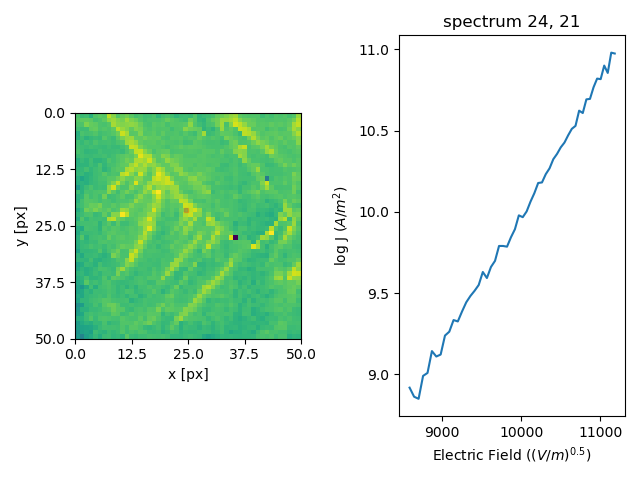

In [6]:
data_path = r'bfo_iv_final.hf5'
dr = sr.NSIDReader(data_path)
dataset_sid = dr.read()[0]
fig = dataset_sid.plot();

## Perform Linear Unmixing (aka Matrix Factorization) on the dataset

We can either use scikit-learn to do this (or other similar packages), or use the pycroscopy package to do it. Here we will choose the latter route, although the former is more transparent.

In [11]:
from pycroscopy.learn.ml.matrix_factor import MatrixFactor

method = 'nmf' #can be 'ica', 'pca' and 'nfindr'
n_components = 3
mfactor = MatrixFactor(dataset_sid, method = method,n_components = n_components)
output = mfactor.do_fit() #this returns the abundances and components

## Plot the results

<IPython.core.display.Javascript object>


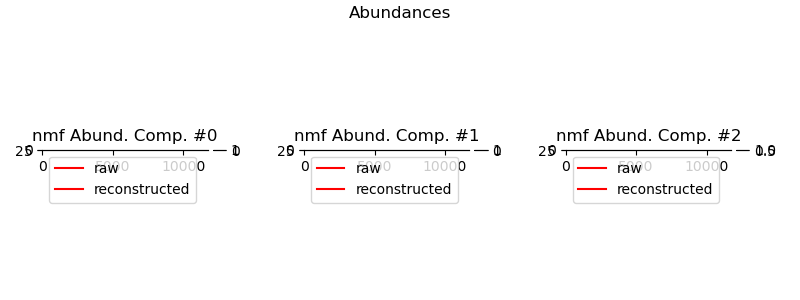

<IPython.core.display.Javascript object>


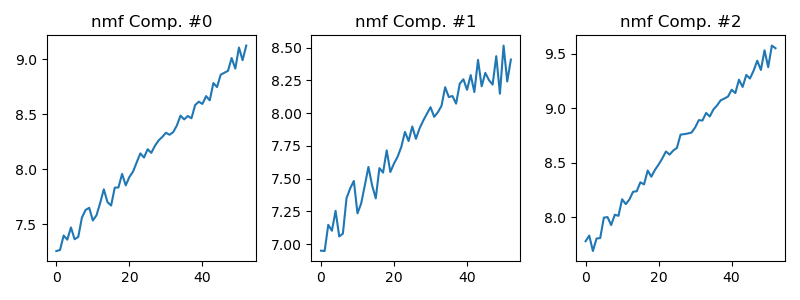

Text(0.5, 1.05, 'Components')

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axes = plt.subplots(nrows=1, ncols=n_components, figsize = (8,3))
for ind, ax in enumerate(axes.flat):
    im1 = ax.imshow(output[0][:,:,ind])
    ax.set_title(method + " Abund. Comp. #" + str(ind))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')
fig.tight_layout()
fig.suptitle('Abundances')

fig2, axes2 = plt.subplots(nrows=1, ncols=n_components, figsize = (8,3))
for ind, ax in enumerate(axes2.flat):
    ax.plot(output[1][ind,:])
    ax.set_title(method + " Comp. #" + str(ind))
    
fig2.tight_layout()
fig2.suptitle('Components', y=1.05)

## Exercise

1. Play with the number of components and also the methods of the unmixing
2. Use the matrix factorization equation to rebuild your original dataset from the provided components and abundances. Can you see how this behaves, for different methods and numbers of components? 